In [79]:
import pandas as pd
import seaborn as sns
import numpy as np

In [80]:
df = pd.read_csv("merge.csv")
df.head()

,sha256,first_submission_date,family
0,98f8e26e12b978102fa39c197f300ebe5fe535617737d5...,1630575593,tnega
1,7b2999ffadbc3b5b5c5e94145ca4e2f8de66ac1e3ddd52...,1629375559,quasar
2,e7569d494fe00be04ef6c9fcc5e54720c0df623b08e79d...,1362057319,pasta
3,1ed60c04f572b6acb9f64c31db55ef5c6b5465bd4da1eb...,1630624233,cjishu
4,4c4aaff20a57213d9a786e56ad22f1eaa94694a2f1042b...,1592186154,kingsoft


<Figure size 1500x1000 with 0 Axes>

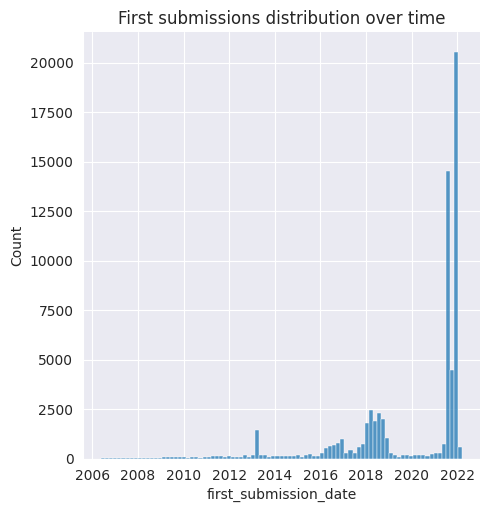

In [175]:
import matplotlib.pyplot as plt

submissions_df = df.copy()
submissions_df['first_submission_date'] = submissions_df['first_submission_date'].apply(
    lambda t: pd.to_datetime(t, unit='s')
)

plt.figure(figsize=(15, 10));
dist_plot = sns.displot(submissions_df, x='first_submission_date');
plt.title("First submissions distribution over time")
plt.show()

In [82]:
def timestamp_to_year_period(t, k):
    dt = pd.to_datetime(t, unit='s')
    return f"{dt.year}-{int((dt.month - 1) / k) + 1}"

df1 = df.copy()
df1['first_submission_trimester'] = (df1['first_submission_date']
                                     .apply(lambda t: timestamp_to_year_period(t, 3)))
df1 = df1.sort_values(by='first_submission_trimester')

<Figure size 1500x1000 with 0 Axes>

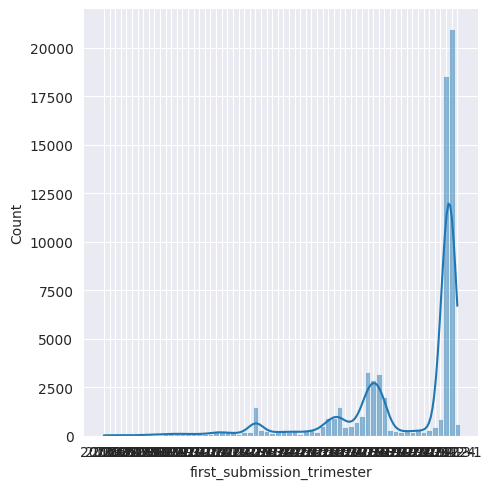

In [157]:
plt.figure(figsize=(15, 10))  # Adjust width and height as needed
dist_plot = sns.displot(df1, x='first_submission_trimester', legend=False, kde=True);
plt.show()

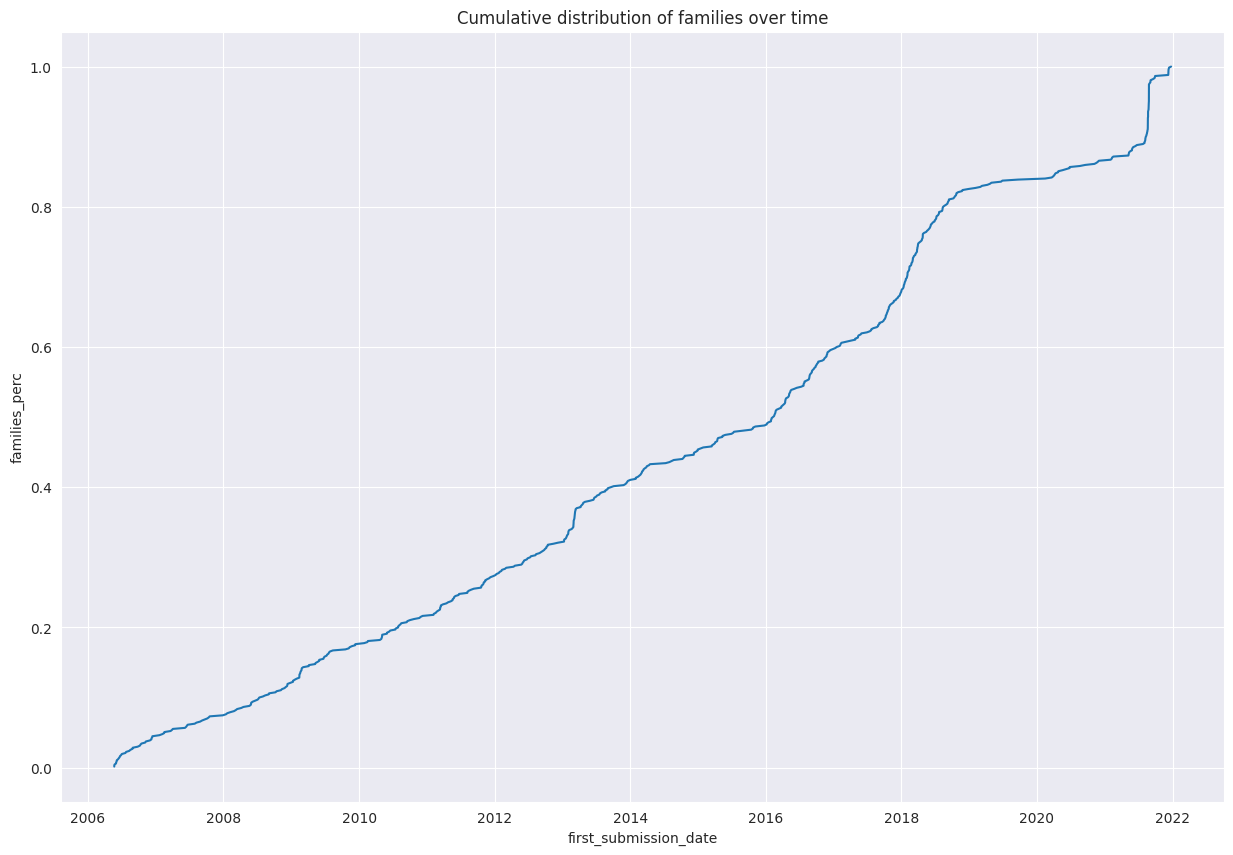

In [174]:
fdf = pd.DataFrame(df[["family", "first_submission_date"]], index=None)

# Group by the rows by the malware family, minimizing the first submission date
fdf = fdf.groupby(by=["family"]).min()

n = len(df)
# For each timestamp, get the number of families previously discovered
fdf['families_perc'] = fdf['first_submission_date'].apply(
    lambda t: len(fdf[fdf['first_submission_date'] <= t]) / n * 100
)

fdf['first_submission_date'] = fdf['first_submission_date'].apply(
    lambda t: pd.to_datetime(t, unit='s')
)

# Sort the date in ascending order
fdf = fdf.sort_values(by="first_submission_date")

plt.figure(figsize=(15, 10))
plt.title("Cumulative distribution of families over time")
dist_plot = sns.lineplot(fdf, x="first_submission_date", y="families_perc")
plt.show()

<Figure size 1500x1000 with 0 Axes>

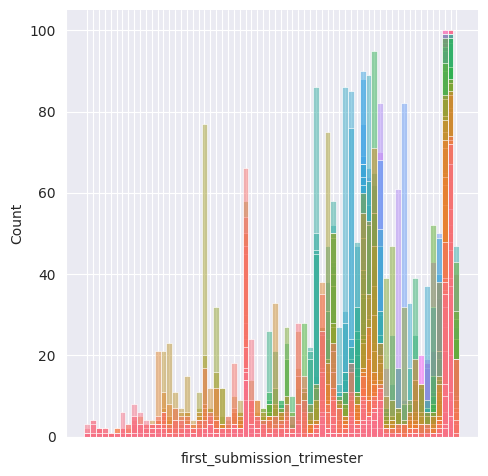

In [150]:
plt.figure(figsize=(15, 10))  # Adjust width and height as needed
dist_plot = sns.displot(df1, x='first_submission_trimester', hue="family", stat="count", legend=False)
dist_plot.set_xticklabels([]);
plt.show()

In [85]:
# import matplotlib.pyplot as plt
# 
# df1 = df.copy()
# 
# df1['first_submission_semester'] = (df1['first_submission_date']
#                                     .apply(lambda t: timestamp_to_year_period(t, 6)))
# df1 = df1.sort_values(by='first_submission_semester')
# 
# plt.figure(figsize=(15, 10))  # Adjust width and height as needed
# boxplot = sns.boxplot(df1, x="first_submission_semester", y="family")
# boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45);
# boxplot.set_yticklabels([]);
# plt.show()

In [86]:
# def time_window_train_test_split(t, start, offset):
#     return "train" if pd.to_datetime(t, unit='s') <= start + pd.DateOffset(months=offset) else "test"
# 
# # Date time df
# dt_df = df.copy()
# dt_df['first_submission_date'] = dt_df['first_submission_date'].apply(lambda t: pd.to_datetime(t, unit='s'))
# 
# dfs = []
# for i in range(3, 12):
#     tdf = dt_df.copy()
#     tdf['window'] = i
#     # Add a column to specify the train or test split: first i months are for training, the remaining for testing
#     tdf['split'] = tdf['first_submission_date'].apply(
#         lambda t: time_window_train_test_split(t, np.min(tdf['first_submission_date']), i)
#     )
#     dfs.append(tdf)

In [87]:
# windowed_df = pd.concat(dfs)
# windowed_df.shape

In [88]:
# sns.boxplot(x="window", y="family", hue='split', data=windowed_df)
# boxplot.set_xticklabels([]);
# boxplot.set_yticklabels([]);

In [89]:
# 
# for family in unique_families:
#     a = np.zeros(len(unique_year_trim))
#     for i, year_trim in enumerate(unique_year_trim):
#         a[i] = len(df1[(df1["first_submission_trimester"] == year_trim) & (df1["family"] == family)])
#         
#     print(a)

In [90]:
# Create a DataFrame with cross-tabulation
cross_tab_df = pd.crosstab(df1["family"], df1["first_submission_trimester"])
cross_tab_df.shape

(670, 64)

In [91]:
cross_tab_df.head()

first_submission_trimester,2006-2,2006-3,2006-4,2007-1,2007-2,2007-3,2007-4,2008-1,2008-2,2008-3,...,2019-4,2020-1,2020-2,2020-3,2020-4,2021-1,2021-2,2021-3,2021-4,2022-1
family,,,,,,,,,,,,,,,,,,,,,
4shared,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,23,0
aauto,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,31,23,0
adaebook,0,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,0,0,8,17,0
addlyrics,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,3,0,1
adgazelle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,8,25,5


In [92]:
tmp_df = cross_tab_df.copy()
tmp_df["variance"] = tmp_df.var(axis=1)
tmp_df = tmp_df.reset_index()
tmp_df.head()

first_submission_trimester,family,2006-2,2006-3,2006-4,2007-1,2007-2,2007-3,2007-4,2008-1,2008-2,...,2020-1,2020-2,2020-3,2020-4,2021-1,2021-2,2021-3,2021-4,2022-1,variance
0,4shared,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,23,0,74.091270
1,aauto,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,31,23,0,24.821429
2,adaebook,0,0,0,0,0,2,1,0,1,...,0,0,0,0,0,0,8,17,0,9.170635
3,addlyrics,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,0,1,13.837302
4,adgazelle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,8,25,5,15.773810


In [93]:
variance_df = pd.DataFrame(tmp_df[["family", "variance"]], index=None)
variance_df.head()

first_submission_trimester,family,variance
0,4shared,74.091270
1,aauto,24.821429
2,adaebook,9.170635
3,addlyrics,13.837302
4,adgazelle,15.773810


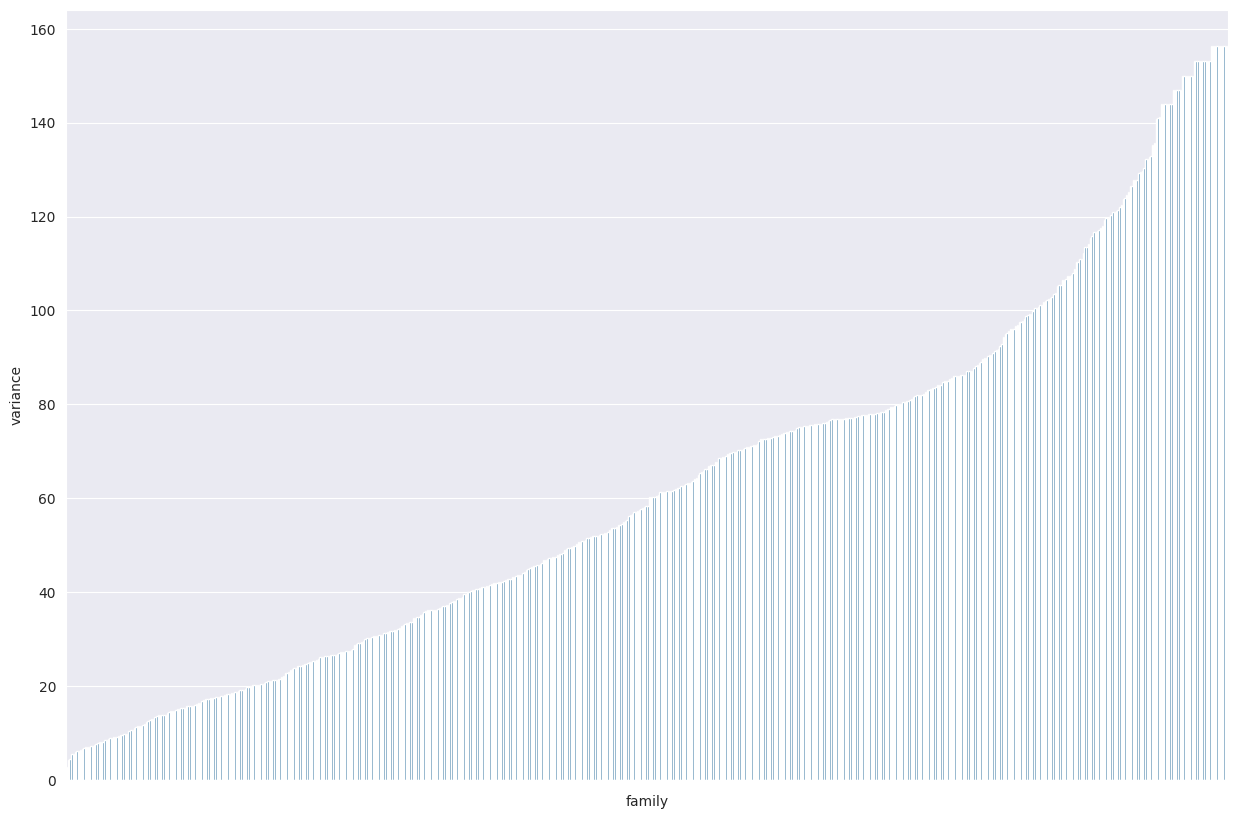

In [152]:
plt.figure(figsize=(15, 10))
variance_df = variance_df.sort_values(by="variance")
dist_plot = sns.barplot(data=variance_df, x="family", y="variance")
dist_plot.set_xticklabels([])
plt.show()

In [95]:
# df_var = tmp_df.copy()
# df_var = df_var.drop("variance", axis=1)
# melted_df = pd.melt(df_var, id_vars=["family"], value_vars=df_var.columns)
# melted_df.shape

In [96]:
# melted_df.head()

In [97]:
# plt.figure(figsize=(15, 10))
# family_dist_box = sns.boxplot(data=melted_df, x="family", y="value")
# family_dist_box.set_xticklabels([])
# plt.show()